In [1]:
import pandas as pd

In [2]:
# Load Project Dataset
combined_data_set=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRXgInZjl6F3DS49pukW6blnNDLBPXNts3gdv_P9ELEHJhFIdqXZ6gqDqVm3gcucg/pub?output=csv")


In [3]:
combined_data_set.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,9350,maua,SP,1.0,credit_card,1.0,18.12,4.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,9350,maua,SP,3.0,voucher,1.0,2.00,4.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,9350,maua,SP,2.0,voucher,1.0,18.59,4.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00,af07308b275d755c9edb36a90c618231,47813,...,19.0,31570,belo horizonte,SP,1.0,boleto,1.0,141.46,4.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,21.0,14840,guariba,SP,1.0,credit_card,3.0,179.12,5.0,auto


DATASET OVERVIEW

In [4]:
combined_data_set.shape

(118310, 35)

In [5]:
# data types(object, int64, float64)
combined_data_set.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   customer_id                    118310 non-null  object 
 2   order_status                   118310 non-null  object 
 3   order_purchase_timestamp       118310 non-null  object 
 4   order_approved_at              118295 non-null  object 
 5   order_delivered_carrier_date   117056 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  118310 non-null  object 
 8   customer_unique_id             118310 non-null  object 
 9   customer_zip_code_prefix       118310 non-null  int64  
 10  customer_city                  118310 non-null  object 
 11  state                          118310 non-null  object 
 12  order_item_id                 

In [6]:
# no missing values found
combined_data_set.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1254
order_delivered_customer_date    2588
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
state                               0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1709
product_name_lenght              1709
product_description_lenght       1709
product_photos_qty               1709
product_weight_g                   20
product_length_cm                  20
product_height_cm                  20
product_width_cm                   20
seller_zip_c

In [7]:
# no duplicate found
combined_data_set.duplicated().sum()

np.int64(419)

# DATA CLEANING AND WRANGLING

In [8]:
# 1. Convert date columns to datetime format
date_columns = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date', 'shipping_limit_date'
]

for column in date_columns:
    combined_data_set[column] = pd.to_datetime(combined_data_set[column], errors='coerce')

In [9]:
# 2. Remove rows that are missing important information
combined_data_set = combined_data_set.dropna(subset=['product_id', 'payment_value'])


In [10]:
# 3. Fill missing product category with 'unknown'
combined_data_set['product_category'] = combined_data_set['product_category'].fillna('unknown')

In [11]:
# 4. Fill missing review scores with the middle (median) value
combined_data_set['review_score'] = combined_data_set['review_score'].fillna(combined_data_set['review_score'].median())

In [12]:
# 5. Fill missing product size and weight info with the median value for each column
size_columns = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

for column in size_columns:
    combined_data_set[column] = combined_data_set[column].fillna(combined_data_set[column].median())

In [13]:
# 6. Clean up text columns by removing spaces
text_columns = ['customer_city', 'state', 'seller_city', 'seller_state', 'product_category']

for column in text_columns:
    combined_data_set[column] = combined_data_set[column].str.strip()

In [14]:
# 7. Remove any duplicate rows
combined_data_set = combined_data_set.drop_duplicates()

In [15]:
# 8. Show the final summary
combined_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117888 entries, 0 to 118309
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117888 non-null  object        
 1   customer_id                    117888 non-null  object        
 2   order_status                   117888 non-null  object        
 3   order_purchase_timestamp       117888 non-null  datetime64[ns]
 4   order_approved_at              117873 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116636 non-null  datetime64[ns]
 6   order_delivered_customer_date  115308 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117888 non-null  datetime64[ns]
 8   customer_unique_id             117888 non-null  object        
 9   customer_zip_code_prefix       117888 non-null  int64         
 10  customer_city                  117888 non-null  object        
 11  state

 # Feature Engineering

In [16]:
# 1. Total number of orders per customer
order_count = combined_data_set.groupby('customer_id')['order_id'].nunique().reset_index()
order_count.columns = ['customer_id', 'total_orders']

In [17]:
# 2. Total money spent per customer
total_spent = combined_data_set.groupby('customer_id')['payment_value'].sum().reset_index()
total_spent.columns = ['customer_id', 'total_spent']

In [18]:
# 3. Average spend per order
avg_spent = total_spent.merge(order_count, on='customer_id')
avg_spent['avg_spend'] = avg_spent['total_spent'] / avg_spent['total_orders']

In [19]:
# 4. Number of unique sellers per customer
seller_count = combined_data_set.groupby('customer_id')['seller_id'].nunique().reset_index()
seller_count.columns = ['customer_id', 'unique_sellers']

In [20]:
# 5. Number of different product categories bought
category_count = combined_data_set.groupby('customer_id')['product_category'].nunique().reset_index()
category_count.columns = ['customer_id', 'unique_categories']

In [21]:
# 6. Get customer's state (location)
customer_state = combined_data_set[['customer_id', 'state']].drop_duplicates()

In [22]:
# 7. Combine all features into one user profile table
user_profiles = order_count.merge(total_spent, on='customer_id') \
                           .merge(avg_spent[['customer_id', 'avg_spend']], on='customer_id') \
                           .merge(seller_count, on='customer_id') \
                           .merge(category_count, on='customer_id') \
                           .merge(customer_state, on='customer_id')

In [23]:
# 8. Show the final user profile table
user_profiles.head()

,customer_id,total_orders,total_spent,avg_spend,unique_sellers,unique_categories,state
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,114.74,1,1,SP
1,000161a058600d5901f007fab4c27140,1,67.41,67.41,1,1,MG
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,195.42,1,1,ES
3,0002414f95344307404f0ace7a26f1d5,1,179.35,179.35,1,1,MG
4,000379cdec625522490c315e70c7a9fb,1,107.01,107.01,1,1,SP


In [24]:
# Save the DataFrame to the same folder as your notebook
user_profiles.to_csv("user_profiles.csv", index=False)


In [25]:
user_profiles =pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQlllPDqeyqhMt9Srrj_OWsnq848SN7O_8LcLeMdWQMdqsDAc3Ize8V1wuGSdEc1d1VCi3YDggtk0n0/pub?output=csv")
combined_data =pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRXgInZjl6F3DS49pukW6blnNDLBPXNts3gdv_P9ELEHJhFIdqXZ6gqDqVm3gcucg/pub?output=csv")

# Merge datasets and create risk_group

In [75]:
# Step 2: Define risk group based on avg_spend
user_profiles['risk_group'] = user_profiles['avg_spend'].apply(lambda x: 'High' if x > 100 else 'Low')

# Merge the datasets on customer_id
merged_data = pd.merge(combined_data_set, user_profiles[['customer_id', 'risk_group']], on='customer_id', how='inner')

# Confirm it worked
print("Merged data shape:", merged_data.shape)
print(merged_data[['customer_id', 'payment_value', 'risk_group']].head())


Merged data shape: (117888, 36)
                        customer_id  payment_value risk_group
0  9ef432eb6251297304e76186b10a928d          18.12        Low
1  9ef432eb6251297304e76186b10a928d           2.00        Low
2  9ef432eb6251297304e76186b10a928d          18.59        Low
3  b0830fb4747a6c6d20dea0b8c802d7ef         141.46       High
4  41ce2a54c0b03bf3443c3d931a367089         179.12       High


In [27]:
# Save the merged data to a CSV file
merged_data.to_csv("merged_data.csv", index=False)


# EDA

# Summary Statistics by Risk Group

In [28]:
# Grouped summary stats
print(merged_data.groupby('risk_group')['payment_value'].describe())


              count        mean         std  min     25%     50%     75%  \
risk_group                                                                 
High        70469.0  250.611830  322.686975  0.0  121.09  167.42  261.82   
Low         47419.0   56.833046   23.233775  0.0   38.63   56.60   75.16   

                 max  
risk_group            
High        13664.08  
Low            99.99  


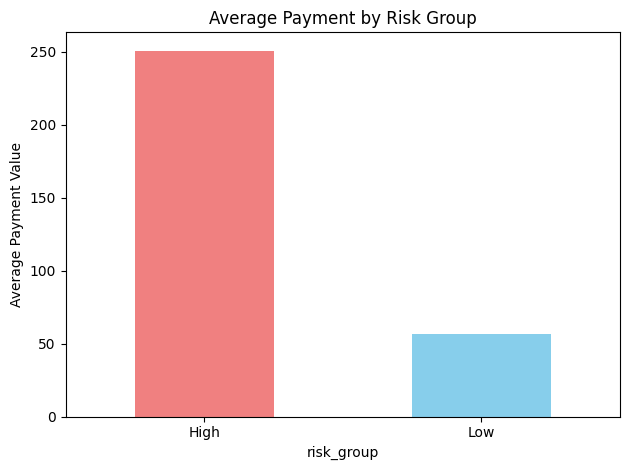

In [29]:
import matplotlib.pyplot as plt

# Calculate group means
group_means = merged_data.groupby('risk_group')['payment_value'].mean()

# Plot
group_means.plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Average Payment by Risk Group')
plt.ylabel('Average Payment Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\ewaki\AppData\Local\Temp\ipykernel_19432\3247069968.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='risk_group', y='payment_value', data=merged_data, palette='pastel')


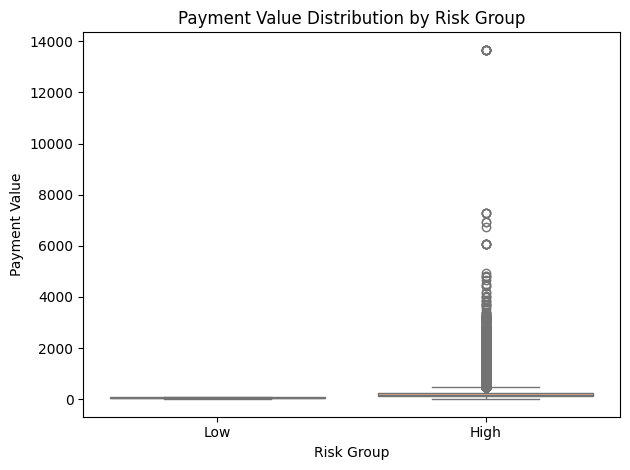

In [30]:
import seaborn as sns

sns.boxplot(x='risk_group', y='payment_value', data=merged_data, palette='pastel')
plt.title('Payment Value Distribution by Risk Group')
plt.ylabel('Payment Value')
plt.xlabel('Risk Group')
plt.tight_layout()
plt.show()


# Average Price by product_category and risk_group

In [64]:
# Group by product category and risk group, then calculate average price
avg_price_by_category = merged_data.groupby(['product_category', 'risk_group'])['payment_value'].mean().reset_index()

# Pivot for better readability (optional)
avg_price_pivot = avg_price_by_category.pivot(index='product_category', columns='risk_group', values='payment_value')

# Display the result
avg_price_pivot = avg_price_pivot.sort_values(by='High', ascending=False)  # or 'Low' if you prefer
avg_price_pivot.head(10)  # Show top 10 most expensive for High risk group


risk_group,High,Low
product_category,,
fixed_telephony,1362.168851,44.113387
computers,1274.286347,52.840000
small_appliances_home_oven_and_coffee,824.905410,53.534706
agro_industry_and_commerce,639.946630,40.848873
home_appliances_2,501.414899,44.193043
musical_instruments,472.562358,64.245747
small_appliances,452.050191,60.375106
signaling_and_security,450.366414,56.873571
construction_tools_safety,407.325226,58.082273


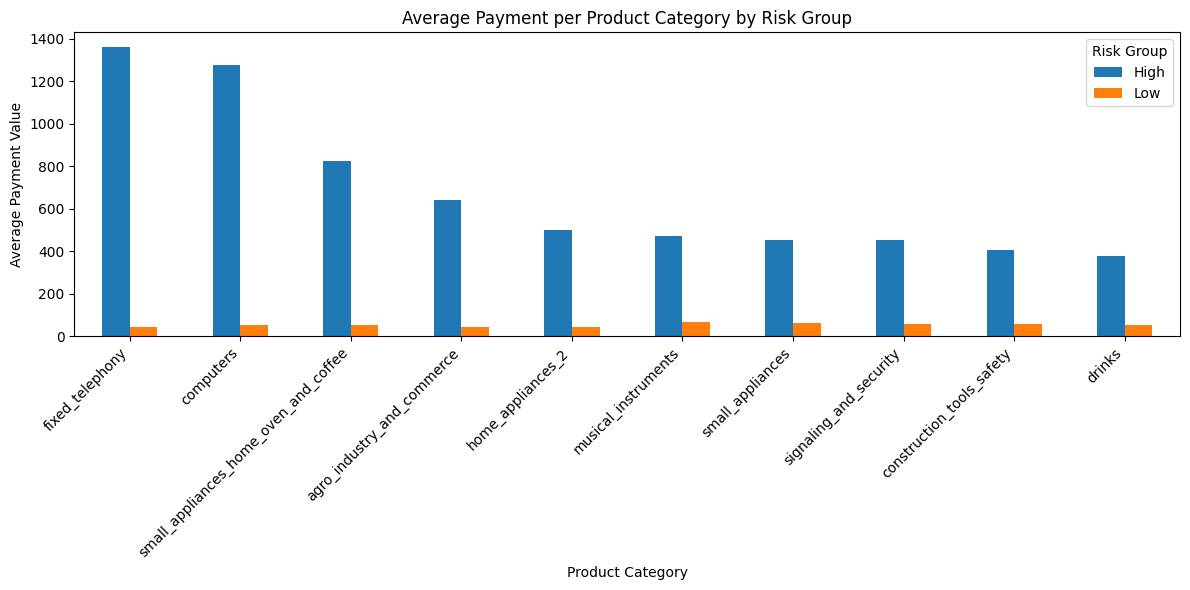

In [65]:
import matplotlib.pyplot as plt

# Prepare the data
avg_price_by_category = merged_data.groupby(['product_category', 'risk_group'])['payment_value'].mean().reset_index()
avg_price_pivot = avg_price_by_category.pivot(index='product_category', columns='risk_group', values='payment_value')
avg_price_pivot = avg_price_pivot.dropna().sort_values(by='High', ascending=False).head(10)  # Top 10 where High risk pays more

# Plot
avg_price_pivot.plot(kind='bar', figsize=(12, 6))
plt.title("Average Payment per Product Category by Risk Group")
plt.ylabel("Average Payment Value")
plt.xlabel("Product Category")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Risk Group")
plt.tight_layout()
plt.show()


In [66]:
from scipy.stats import ttest_ind

# List of shared product categories
shared_categories = merged_data.groupby(['product_category', 'risk_group']).size().unstack().dropna().index

# Store results
results = []

# Run Welch’s t-test for each shared category
for category in shared_categories:
    high = merged_data[(merged_data['product_category'] == category) & (merged_data['risk_group'] == 'High')]['payment_value']
    low = merged_data[(merged_data['product_category'] == category) & (merged_data['risk_group'] == 'Low')]['payment_value']
    
    t_stat, p_val = ttest_ind(high, low, equal_var=False)
    results.append({
        'product_category': category,
        'high_mean': high.mean(),
        'low_mean': low.mean(),
        't_stat': t_stat,
        'p_value': p_val
    })

# Convert to DataFrame
import pandas as pd
t_test_df = pd.DataFrame(results)

# Sort by p-value (lowest first)
t_test_df = t_test_df.sort_values(by='p_value')

# Display significant differences (p < 0.05)
significant_diff = t_test_df[t_test_df['p_value'] < 0.05]
significant_diff.head(10)


,product_category,high_mean,low_mean,t_stat,p_value
68,watches_gifts,289.795488,63.667194,50.775036,0.000000e+00
49,housewares,226.439611,55.174526,43.911818,0.000000e+00
43,health_beauty,244.023126,58.817851,57.791403,0.000000e+00
7,bed_bath_table,191.619008,62.050054,71.085690,0.000000e+00
63,sports_leisure,216.613841,59.647235,52.403887,0.000000e+00
39,furniture_decor,216.798598,61.929648,59.954900,0.000000e+00
58,perfumery,202.462504,57.062573,56.367841,0.000000e+00
15,computers_accessories,288.392498,58.261391,46.533145,0.000000e+00
67,toys,208.191420,62.726670,41.858534,4.081339e-291
20,cool_stuff,240.402304,60.065779,38.354461,1.528895e-264


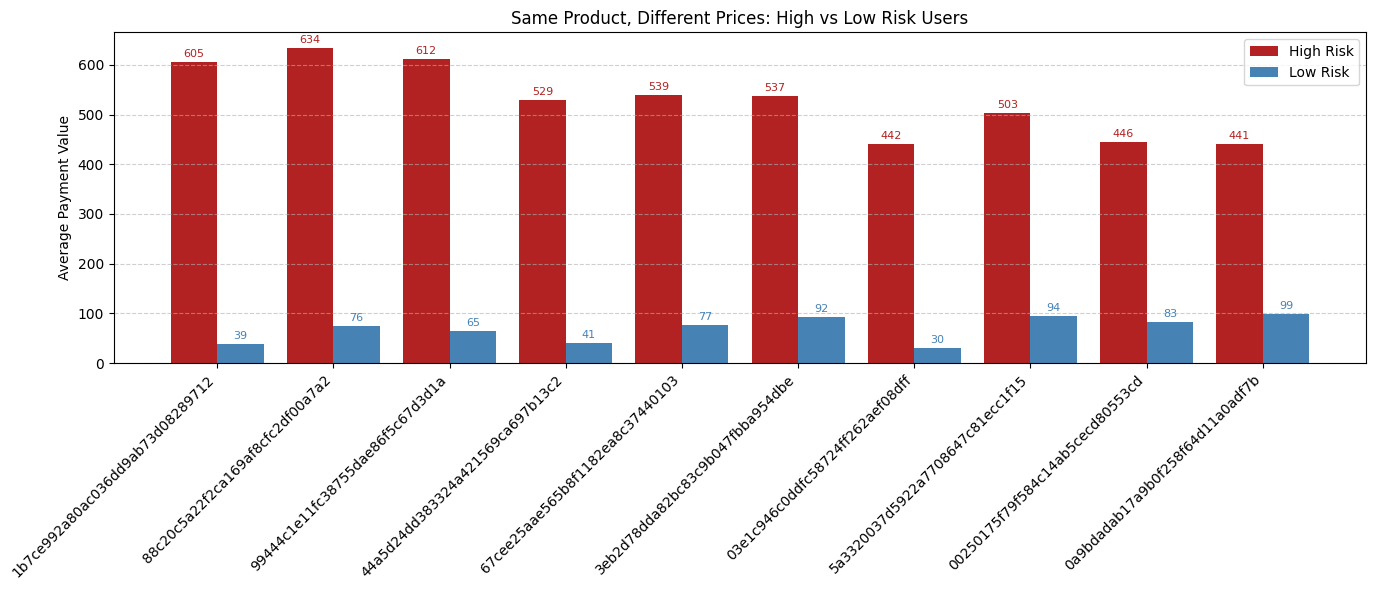

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare and sort data by price gap
data = {
    'product_id': [
        '88c20c5a22f2ca169af8cfc2df00a7a2', '99444c1e11fc38755dae86f5c67d3d1a',
        '1b7ce992a80ac036dd9ab73d08289712', '67cee25aae565b8f1182ea8c37440103',
        '3eb2d78dda82bc83c9b047fbba954dbe', '44a5d24dd383324a421569ca697b13c2',
        '5a3320037d5922a7708647c81ecc1f15', '00250175f79f584c14ab5cecd80553cd',
        '03e1c946c0ddfc58724ff262aef08dff', '0a9bdadab17a9b0f258f64d11a0adf7b'
    ],
    'high_mean': [633.73, 612.26, 604.84, 539.12, 536.52, 528.78, 502.76, 445.55, 441.72, 441.39],
    'low_mean': [75.53, 65.25, 38.70, 76.73, 92.11, 41.43, 94.25, 82.64, 29.99, 98.53]
}

df = pd.DataFrame(data)
df['price_gap'] = df['high_mean'] - df['low_mean']
df = df.sort_values(by='price_gap', ascending=False).reset_index(drop=True)

# Step 2: Plot
plt.figure(figsize=(14, 6))
bar_width = 0.4
x = range(len(df))

# Bars
plt.bar(x, df['high_mean'], width=bar_width, label='High Risk', color='firebrick')
plt.bar([p + bar_width for p in x], df['low_mean'], width=bar_width, label='Low Risk', color='steelblue')

# Labels
for i in x:
    plt.text(i, df['high_mean'][i] + 10, f"{df['high_mean'][i]:.0f}", ha='center', fontsize=8, color='firebrick')
    plt.text(i + bar_width, df['low_mean'][i] + 10, f"{df['low_mean'][i]:.0f}", ha='center', fontsize=8, color='steelblue')

# Axes & titles
plt.xticks([p + bar_width / 2 for p in x], df['product_id'], rotation=45, ha='right')
plt.ylabel("Average Payment Value")
plt.title("Same Product, Different Prices: High vs Low Risk Users")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show
plt.show()


# HYPOTHESIS TESTING

Null hypothesis (H₀): There is no difference in the average payment_value between high-risk and low-risk users.

Alternative hypothesis (H₁): There is a significant difference in the average payment_value between high-risk and low-risk users.

In [31]:
import pandas as pd

merged_data=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jkD9SPnUSYIwszcWo3--8i74tOXY_TY3bpKgm05sQdbE1BA32m_L_6RYxQMqAQ/pub?output=csv")


In [44]:
merged_data.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category,risk_group,price_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,1,credit_card,1,18.12,4.0,housewares,Low,Low
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,3,voucher,1,2.00,4.0,housewares,Low,Low
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,2,voucher,1,18.59,4.0,housewares,Low,Low
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00,af07308b275d755c9edb36a90c618231,47813,...,belo horizonte,SP,1,boleto,1,141.46,4.0,perfumery,High,Medium
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,guariba,SP,1,credit_card,3,179.12,5.0,auto,High,High


In [45]:
merged_data.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_score', 'product_category', 'risk_group',
       'price_category'],
      dtype='object')

# Welch’s t-test

In [32]:
from scipy.stats import ttest_ind

high_risk = merged_data[merged_data['risk_group'] == 'High']['payment_value']
low_risk = merged_data[merged_data['risk_group'] == 'Low']['payment_value']

# Perform Welch's t-test
t_stat, p_value = ttest_ind(high_risk, low_risk, equal_var=False)

# Print results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("Result: Statistically significant — High and Low risk users pay different prices.")
else:
    print("Result: Not statistically significant — No clear price difference.")


T-statistic: 159.131
P-value: 0.00000
Result: Statistically significant — High and Low risk users pay different prices.


# Chi-square test

In [33]:
# Define price bands
def price_category(value):
    if value < 50:
        return 'Low'
    elif value <= 150:
        return 'Medium'
    else:
        return 'High'

# Apply to merged_data
merged_data['price_category'] = merged_data['payment_value'].apply(price_category)


In [34]:
contingency = pd.crosstab(merged_data['risk_group'], merged_data['price_category'])
print("Contingency Table:")
print(contingency)


Contingency Table:
price_category   High    Low  Medium
risk_group                          
High            41263   2018   27403
Low                 0  19666   27957


In [35]:
from scipy.stats import chi2_contingency

chi2_stat, p_value, dof, expected = chi2_contingency(contingency)

print(f"Chi-square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Result: Statistically significant — risk group and price category are related.")
else:
    print("Result: Not statistically significant — no clear link between risk group and price category.")


Chi-square Statistic: 53156.31
P-value: 0.00000
Result: Statistically significant — risk group and price category are related.


# Train a Random Forest Regressor

In [59]:
from sklearn.model_selection import train_test_split

# Re-select and prepare features
features = ['product_category', 'payment_type', 'payment_installments', 'review_score', 'risk_group']
target = 'payment_value'

# Drop missing values
ml_data = merged_data[features + [target]].dropna()

# One-hot encode categorical variables
ml_data_encoded = pd.get_dummies(ml_data, columns=['product_category', 'payment_type', 'risk_group'], drop_first=True)

# Split features and target
X = ml_data_encoded.drop('payment_value', axis=1)
y = ml_data_encoded['payment_value']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Manual RMSE calculation
r2 = r2_score(y_test, y_pred)

# Output results
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


RMSE: 214.24
R² Score: 0.288


# Analyse Feature Importance 

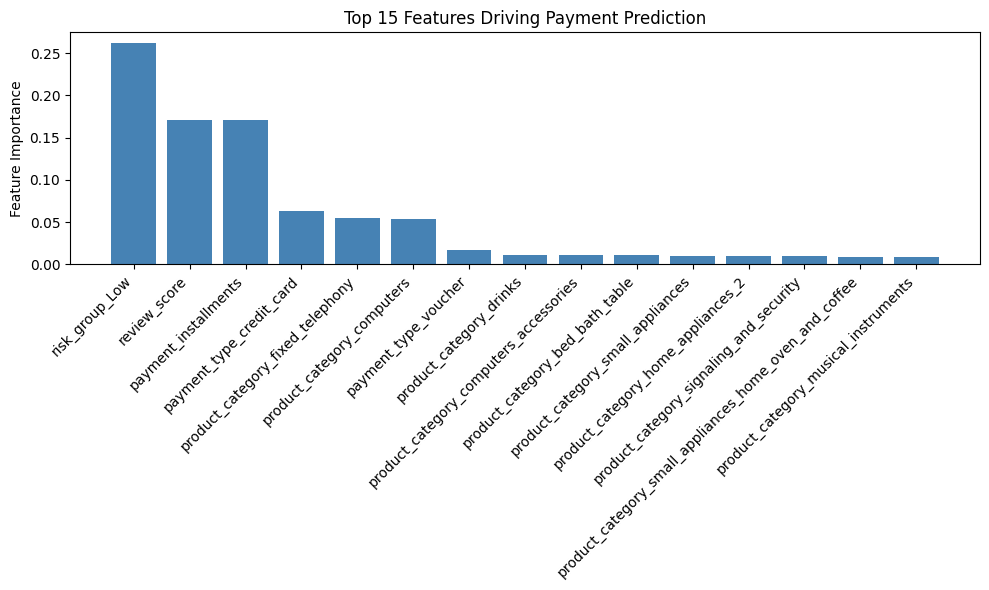

In [63]:
# Sort features by importance
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
top_features = importance_df.sort_values(by='importance', ascending=False).head(15)

# Plot top features (vertical bars, features on x-axis)
plt.figure(figsize=(10, 6))
plt.bar(top_features['feature'], top_features['importance'], color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Feature Importance")
plt.title("Top 15 Features Driving Payment Prediction")
plt.tight_layout()
plt.show()


# Feature EXpansion + Model Training 

In [46]:
selected_features = [
    'freight_value', 'product_weight_g', 'product_description_lenght',
    'product_photos_qty', 'product_length_cm', 'product_height_cm', 'product_width_cm',
    'review_score', 'payment_type', 'payment_installments',
    'product_category', 'seller_state', 'risk_group'
]

# Drop missing rows
ml_data = merged_data[selected_features + ['payment_value']].dropna()

# One-hot encode categorical variables
ml_data_encoded = pd.get_dummies(
    ml_data,
    columns=['product_category', 'payment_type', 'risk_group', 'seller_state'],
    drop_first=True
)

# Split features and target
X = ml_data_encoded.drop('payment_value', axis=1)
y = ml_data_encoded['payment_value']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train a tuned Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Improved RMSE: {rmse:.2f}")
print(f"Improved R² Score: {r2:.3f}")


Improved RMSE: 158.76
Improved R² Score: 0.601


# Compare with Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R² Score: {r2_lr:.3f}")


Linear Regression RMSE: 207.95
Linear Regression R² Score: 0.316


# Feature Importance Plot for Tune Model

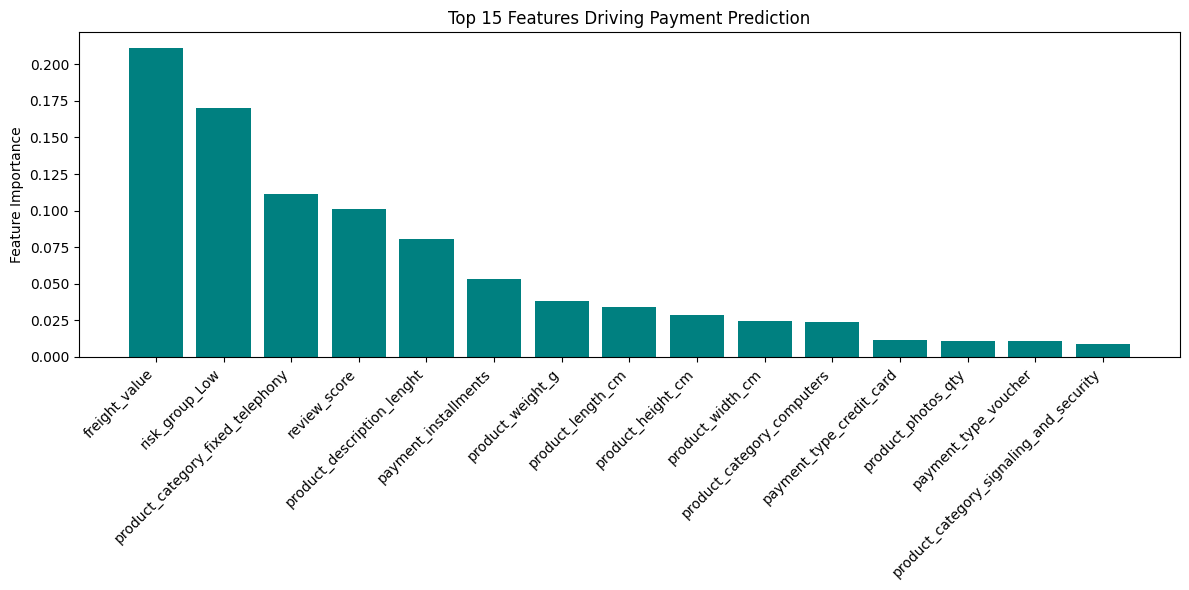

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort and select top 15
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
top_features = importance_df.sort_values(by='importance', ascending=False).head(15)

# Plot horizontal bar chart (features on x-axis)
plt.figure(figsize=(12, 6))
plt.bar(top_features['feature'], top_features['importance'], color='teal')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Feature Importance")
plt.title("Top 15 Features Driving Payment Prediction")
plt.tight_layout()
plt.show()
